# 📈 Google Stock Analysis: Business Signals & Economic Insights from 2018–2024

## 📌 Overview
This project explores historical stock price data of **Google (GOOG)** to identify business and economic signals embedded in market behavior. The analysis aims to uncover trends, volatility patterns, trading volumes, and potential investment opportunities over time. This end-to-end portfolio includes data exploration, financial insights, and potential forecasting models.

---

## 📊 Exploratory Data Analysis (EDA)

We begin by analyzing key aspects of Google’s stock performance:

### 📅 Temporal Price Movement
- **Close & Adjusted Close Price** trends over 7 years
- Key market events (e.g., COVID-19, AI breakthroughs, interest rate shifts)

### 📉 Volatility & Risk Behavior
- **Daily Returns**: Distribution and behavior of price changes
- **Rolling Statistics**: Moving averages (SMA, EMA) for trend smoothing

### 📊 Trading Volume Trends
- Relationship between **volume spikes** and **price jumps**
- Volume as a proxy for investor sentiment and institutional activity

### 🔄 Price Relationships
- Difference and interaction between **open, high, low, and close prices**
- Candlestick structure exploration for technical analysis patterns

---

## 📚 Business & Economic Insights

- 🧭 **Market Reaction to Events**: Stock reacts strongly to tech earnings, Fed decisions, and innovation news.
- 🔁 **Volatility Clusters**: Periods of high volatility reflect macroeconomic uncertainty and investor repositioning.
- 📈 **Steady Long-Term Growth**: Despite fluctuations, the long-term price trajectory shows robust brand and business fundamentals.
- 🧮 **Volume Precedes Movement**: Spikes in trading volume often precede or confirm directional price changes, hinting at institutional trading or news reactions.

---

## 🤖 Forecasting & Simulation

### 🎯 Objective: Forecast **Future Stock Price** or simulate investment performance

- 📊 **Features Considered:**
  - `Close`, `Adj Close`
  - `Volume`
  - `Returns`, `SMA_30`, `SMA_90`

- 🔧 **Modeling Approaches:**
  - Time Series Forecasting (ARIMA / Prophet)
  - LSTM-based sequence prediction (optional for deep learning)

- 💼 **Simulation Use Case:**
  - "If I invested $10,000 in 2018, what would it be worth by 2024?"
  - Comparative strategy: Buy & Hold vs. Moving Average Cross Strategy

---

## 📌 Key Insights

- 💡 Google stock shows strong **resilience and upward momentum** in the long run.
- 💡 Trading volumes **surge around earnings reports and tech market moves**, aligning with business cycles.
- 💡 Incorporating technical indicators like **SMA/EMA** helps investors spot trend reversals or breakout moments.
- 💡 Risk-adjusted strategies using volatility signals or SMA crossovers may outperform passive investing under certain conditions.

---

## 🔧 Tools & Technologies Used

- **Programming Language:** Python 🐍  
- **Data Handling:** Pandas, NumPy  
- **Visualization:** Matplotlib, Seaborn, Plotly  
- **Time Series Modeling:** Statsmodels (ARIMA), Facebook Prophet, PyTorch (optional LSTM)  
- **Techniques Applied:**  
  - Financial EDA  
  - Return Calculation & Rolling Analysis  
  - Time Series Decomposition  
  - Price Forecasting & Investment Simulation  

---

## 📎 Dataset Information

- **Source:** Internal CSV (`Google_Stock_Price.csv`)  
- **Total Observations:** 1,761 daily entries  
- **Time Range:** 2018–01–02 to 2024  
- **Features Overview:**
  - `Open`, `High`, `Low`, `Close`: Daily price ranges
  - `Adj Close`: Adjusted for dividends/splits
  - `Volume`: Number of shares traded
  - `Dividends`, `Splits`: Corporate actions

- **Target Outcomes:**  
  - Stock trend movement  
  - Forecasted closing prices  
  - Simulated investment return  

---

## 🧑‍💻 Author

- **Hilda Adina Rahmi**  
  Aspiring Data Scientist passionate about financial analytics, time series modeling, and turning market data into actionable economic insight.


In [1]:
# 📦 Load the necessary libraries for Google Stock Price Analysis

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Time series tools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

# System & warnings
import warnings
warnings.filterwarnings('ignore')

# 🧠 Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# 🗂️ Load dataset
df = pd.read_csv("Google_Stock_Price.csv")

# ⏱️ Convert date column if needed
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

# 🧹 Sort by date to maintain time order
df = df.sort_values(by='date')

# 👀 Preview the data
df.head()

,symbol,date,open,high,low,close,volume,adjclose,dividends,splits
0,GOOG,2018-01-02,52.417000,53.347000,52.261501,53.250000,24752000,53.059353,0.0,0.0
1,GOOG,2018-01-03,53.215500,54.314499,53.160500,54.124001,28604000,53.930225,0.0,0.0
2,GOOG,2018-01-04,54.400002,54.678501,54.200100,54.320000,20092000,54.125519,0.0,0.0
3,GOOG,2018-01-05,54.700001,55.212502,54.599998,55.111500,25582000,54.914188,0.0,0.0
4,GOOG,2018-01-08,55.111500,55.563499,55.081001,55.347000,20952000,55.148846,0.0,0.0


In [3]:
# Show basic info
print("📄 Data Info:")
df.info()

# Show shape and column names
print("\n🔢 Dataset Shape:", df.shape)
print("🧾 Column Names:", df.columns.tolist())

# Show first few rows
print("\n🔍 First 5 Rows:")
df.head()

📄 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   symbol     1761 non-null   object        
 1   date       1761 non-null   datetime64[ns]
 2   open       1761 non-null   float64       
 3   high       1761 non-null   float64       
 4   low        1761 non-null   float64       
 5   close      1761 non-null   float64       
 6   volume     1761 non-null   int64         
 7   adjclose   1761 non-null   float64       
 8   dividends  1761 non-null   float64       
 9   splits     1761 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 137.7+ KB

🔢 Dataset Shape: (1761, 10)
🧾 Column Names: ['symbol', 'date', 'open', 'high', 'low', 'close', 'volume', 'adjclose', 'dividends', 'splits']

🔍 First 5 Rows:


,symbol,date,open,high,low,close,volume,adjclose,dividends,splits
0,GOOG,2018-01-02,52.417000,53.347000,52.261501,53.250000,24752000,53.059353,0.0,0.0
1,GOOG,2018-01-03,53.215500,54.314499,53.160500,54.124001,28604000,53.930225,0.0,0.0
2,GOOG,2018-01-04,54.400002,54.678501,54.200100,54.320000,20092000,54.125519,0.0,0.0
3,GOOG,2018-01-05,54.700001,55.212502,54.599998,55.111500,25582000,54.914188,0.0,0.0
4,GOOG,2018-01-08,55.111500,55.563499,55.081001,55.347000,20952000,55.148846,0.0,0.0


In [4]:
# Checking for missing values and summarizing the statistics of the dataset
missing_values = df.isnull().sum()
summary_statistics = df.describe(include='all')

# Displaying the missing values and summary statistics
print(missing_values)
print(summary_statistics)

symbol       0
date         0
open         0
high         0
low          0
close        0
volume       0
adjclose     0
dividends    0
splits       0
dtype: int64
       symbol                           date         open         high  \
count    1761                           1761  1761.000000  1761.000000   
unique      1                            NaN          NaN          NaN   
top      GOOG                            NaN          NaN          NaN   
freq     1761                            NaN          NaN          NaN   
mean      NaN  2021-07-01 15:36:17.172061440   102.021411   103.171589   
min       NaN            2018-01-02 00:00:00    48.695000    50.176998   
25%       NaN            2019-10-02 00:00:00    61.463001    62.043999   
50%       NaN            2021-07-01 00:00:00   100.059998   101.658997   
75%       NaN            2023-03-31 00:00:00   135.570007   137.070999   
max       NaN            2024-12-31 00:00:00   198.529999   202.880005   
std       NaN          

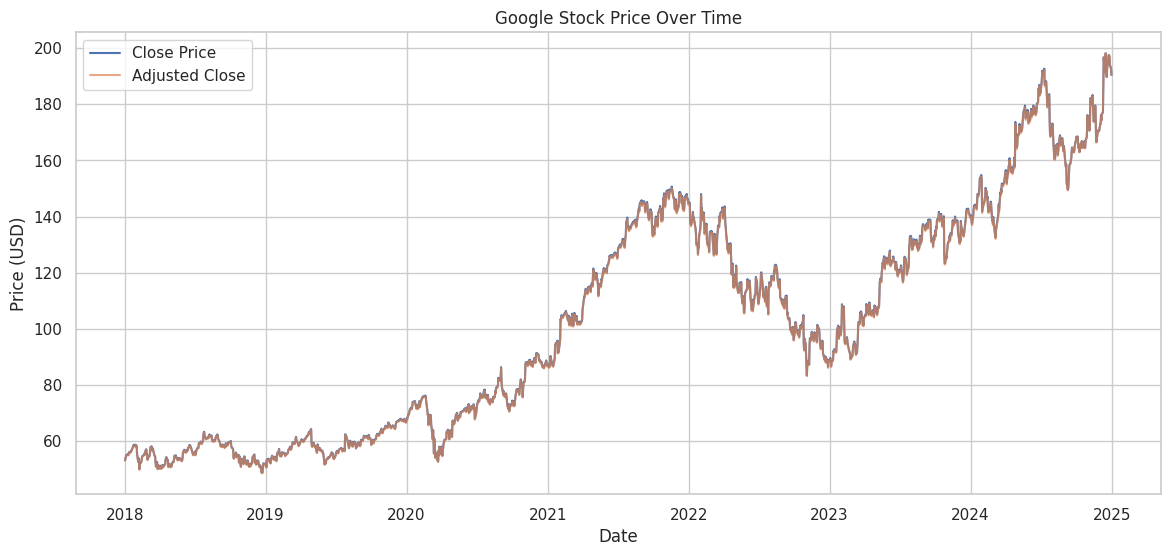

In [8]:
# ------- 📅 Temporal Price Movement -------
plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='Close Price')
plt.plot(df['adjclose'], label='Adjusted Close', alpha=0.7)
plt.title("Google Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# 📈 Google Stock Price (2018–2025): A Story of Resilience and Innovation

> _"Stock prices aren’t just numbers—they’re economic narratives."_  

This chart shows Google (Alphabet) stock price trends from 2018 to 2025, revealing powerful insights into the tech industry, market psychology, and global economic conditions.

---

## 🔍 Key Highlights

- 📊 **2018–2021:** Strong upward trend driven by digital transformation and booming ad revenues.
- 📉 **2022–Early 2023:** Market correction amid inflation, rising interest rates, and recession fears.
- 🚀 **2023–2025:** Rebound to all-time highs, powered by AI leadership, cloud expansion, and investor confidence.

---

## 🧠 Economic Insights

- **Market Cycles Matter:** Even tech giants aren’t immune to macroeconomic forces.
- **Innovation Drives Value:** Despite volatility, long-term bets on innovation show strong returns.
- **Investor Sentiment = Economic Signal:** Recovery reflects optimism about Google’s adaptability and future growth.

---

## 💼 Business Takeaways

✅ **Diversify & Innovate:** Google’s resilience came from expanding beyond search into AI, cloud, and hardware.

📉 **Short-term Dips ≠ Long-term Failure:** Strategic patience wins over reactionary decisions.

📈 **Read the Signals:** Stock movements often foreshadow wider economic patterns—stay informed.

---

## 📌 Final Thought

> _"Google’s stock from 2018 to 2025 is more than a price chart—it's a roadmap for navigating uncertainty with innovation and vision."_  

---


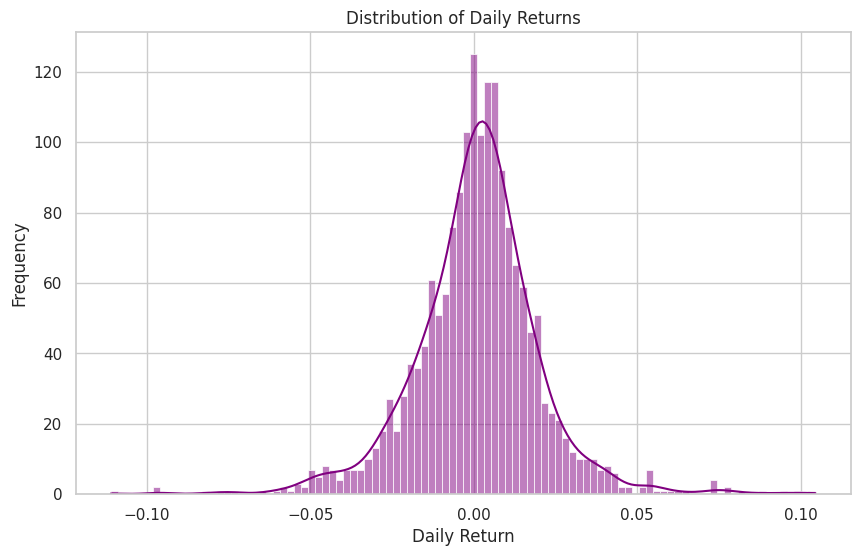

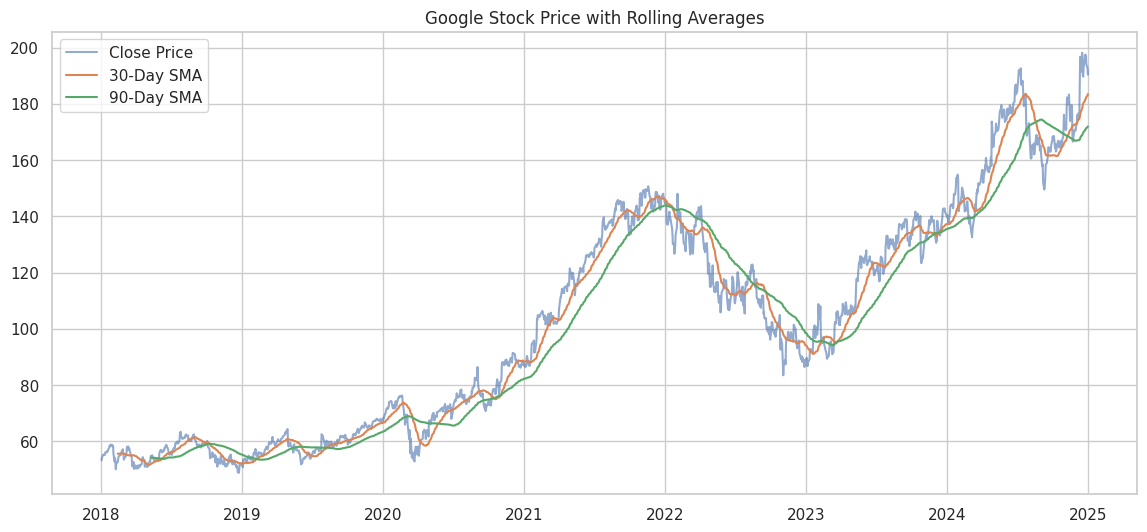

In [9]:
# ------- 📉 Volatility & Risk Behavior -------

# Daily returns
df['daily_return'] = df['close'].pct_change()

# Plot return distribution
sns.histplot(df['daily_return'].dropna(), bins=100, kde=True, color='purple')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

# Rolling mean and standard deviation
df['sma_30'] = df['close'].rolling(window=30).mean()
df['sma_90'] = df['close'].rolling(window=90).mean()

# Plot with moving averages
plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='Close Price', alpha=0.6)
plt.plot(df['sma_30'], label='30-Day SMA')
plt.plot(df['sma_90'], label='90-Day SMA')
plt.title("Google Stock Price with Rolling Averages")
plt.legend()
plt.show()

# 📈 Google Stock Analysis (2018–2025): A Business & Economic Perspective

> _"Stock performance reflects not only investor sentiment, but deeper shifts in strategy, innovation, and macroeconomic forces."_

---

## 1. 🔮 Long-Term Performance: Strategic Growth Amid Economic Cycles

### 🔍 Economic & Business Insights:
- **2018–2021: Secular Growth Phase**
  - Strong macro environment with low interest rates boosted tech valuations.
  - Google capitalized on rising digital ad spending and cloud adoption.
  - Expansion into AI and hardware supported diversified revenue streams.

- **2022–Early 2023: Market Repricing**
  - The Fed’s aggressive rate hikes to combat inflation triggered a tech sell-off.
  - Valuations normalized as investor focus shifted to profitability and cash flow.
  - Google faced challenges including cost-cutting, regulatory scrutiny, and competition from AI startups.

- **2023–2025: Recovery and Transformation**
  - Strategic pivot towards **AI (Bard, Gemini)** and **cloud computing (GCP)** attracted investor confidence.
  - Operational efficiency improved through layoffs, AI integration, and tighter capital allocation.
  - Stock price reflects regained optimism in sustainable innovation and earnings power.

---

## 2. 📉 Return Distribution: Understanding Risk & Investor Behavior

### 📊 Economic & Risk Insights:
- The daily return histogram shows a **leptokurtic distribution**—frequent small moves with occasional extreme events.
- Fat tails suggest exposure to **market shocks** (e.g., earnings misses, macro news).
- Despite average daily returns centering around 0%, **tail risk is material** — highlighting the importance of hedging and risk modeling.
- For portfolio managers: **risk-adjusted return** metrics (like Sharpe ratio) are essential due to this volatility structure.

---

## 3. 📈 Technical Patterns: Moving Averages Reveal Strategic Momentum

### 📈 Business Trend Analysis:
- **30-day SMA** captures short-term sentiment and momentum.
- **90-day SMA** smooths out noise, reflecting mid-term market confidence.
- Crossovers signal changes in investor expectations:
  - Bullish crossovers post-2023 indicate **renewed belief in Google's strategic direction**.
  - Long-term uptrend reflects strong earnings reports and positive guidance.

---

## 💼 Strategic Takeaways for Business and Investors

1. **Strategic Innovation Pays Off**
   - Google’s resilience in stock price correlates with bold investment in frontier tech (AI, quantum, cloud).
   - Diversification mitigates risks from ad market dependency.

2. **Macroeconomic Forces Matter**
   - Interest rate cycles directly affect tech valuations.
   - Global events (COVID-19, supply chain, regulation) add layers of complexity.

3. **Execution Efficiency is Key**
   - Stock rebounds often follow operational restructuring (e.g., layoffs, margin focus).
   - Markets reward companies that adapt rapidly to economic headwinds.

---

## 🧠 Final Thought

> _"Google’s stock chart from 2018 to 2025 is a real-time case study in how macroeconomics, innovation, and corporate strategy intertwine."_  

For investors, analysts, and entrepreneurs, understanding the **"why"** behind stock movements offers more insight than numbers alone.

---



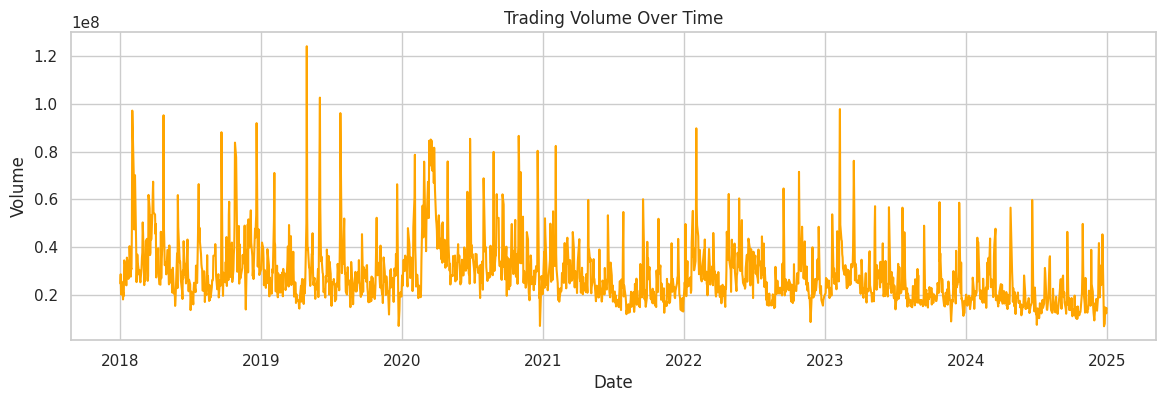

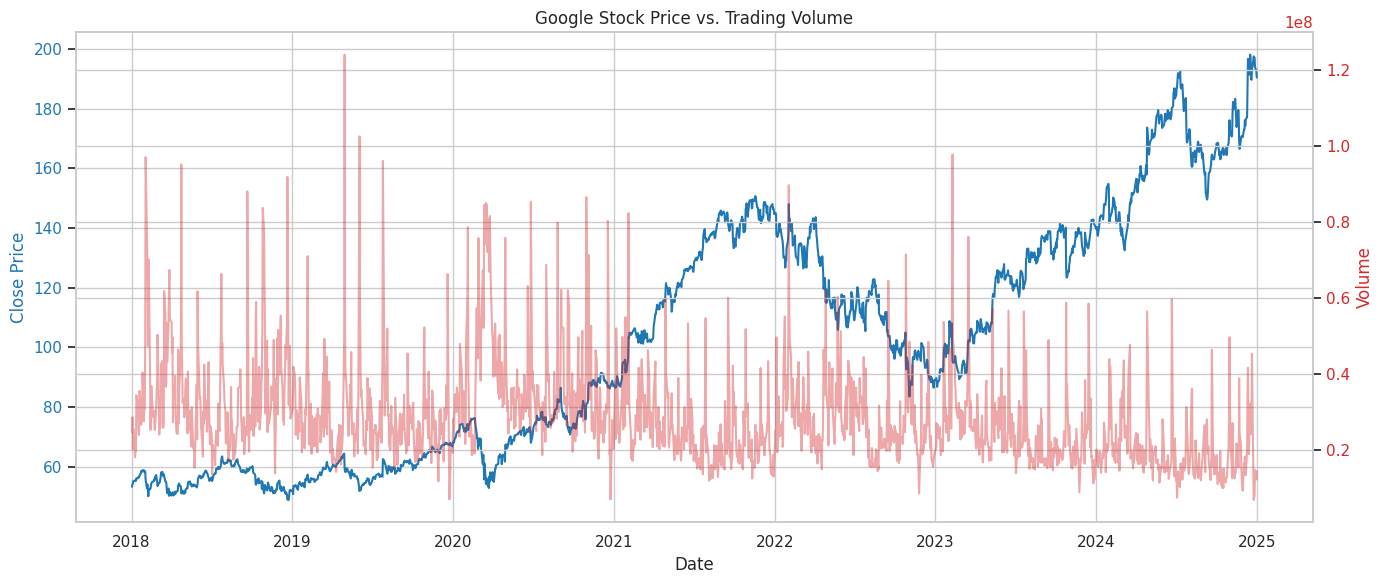

In [10]:
# ------- 📊 Trading Volume Trends -------
plt.figure(figsize=(14, 4))
plt.plot(df['volume'], color='orange')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

# Volume vs Close price (dual-axis)
fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color)
ax1.plot(df.index, df['close'], color=color, label='Close Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # secondary axis
color = 'tab:red'
ax2.set_ylabel('Volume', color=color)
ax2.plot(df.index, df['volume'], color=color, alpha=0.4, label='Volume')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Google Stock Price vs. Trading Volume")
fig.tight_layout()
plt.show()

## Analysis of Google Stock Trading Volume and Price (2018–2025)

### 1. Trading Volume Over Time

The first chart illustrates the fluctuation in Google's daily trading volume from 2018 to 2025. We can observe several key patterns:

- **High volatility in volume during 2018–2020**, possibly due to broader market uncertainty or corporate-specific events, such as earnings releases or regulatory issues.
- **Spikes in volume** tend to coincide with major market or economic events (e.g., the COVID-19 pandemic in early 2020).
- From 2021 onwards, trading volume shows a **gradual decline and stabilization**, suggesting a maturing market sentiment or reduced speculative trading.

From a business economics perspective, **trading volume serves as a proxy for investor interest and market activity**. A declining volume may indicate that investors are holding long-term positions or have shifted focus to other assets or sectors.

---

### 2. Google Stock Price vs. Trading Volume

This second chart overlays Google's adjusted closing price (blue line) with trading volume (red bars), allowing us to analyze the **relationship between price movements and investor activity**:

- **During price rallies**, such as the one starting in late 2020 through early 2022, volume occasionally spikes, implying strong buying interest.
- **In periods of price correction or stagnation**, volume becomes more erratic, suggesting uncertainty or divergence in investor expectations.
- Despite **volume declining from 2021 onwards**, the stock price exhibits a strong uptrend post-2023, indicating growing investor confidence and possible institutional accumulation.

### Business Insights:

- **Investor Sentiment**: A bullish trend in price despite lower volume suggests that long-term investors may be accumulating shares, reducing liquidity in the market.
- **Market Efficiency**: The alignment of volume spikes with significant price movements supports the efficient market hypothesis—news and events are quickly reflected in trading activity.
- **Strategic Implications**: For corporate finance teams, the observed trends highlight the importance of maintaining investor relations and transparency, especially during volatile periods to sustain trust and price stability.

---

### Conclusion

The analysis of Google's trading volume and price trends over time offers valuable insights into market behavior, investor psychology, and the underlying health of the stock. For stakeholders—including analysts, investors, and Google’s management—understanding these dynamics is essential for strategic planning and valuation assessments.


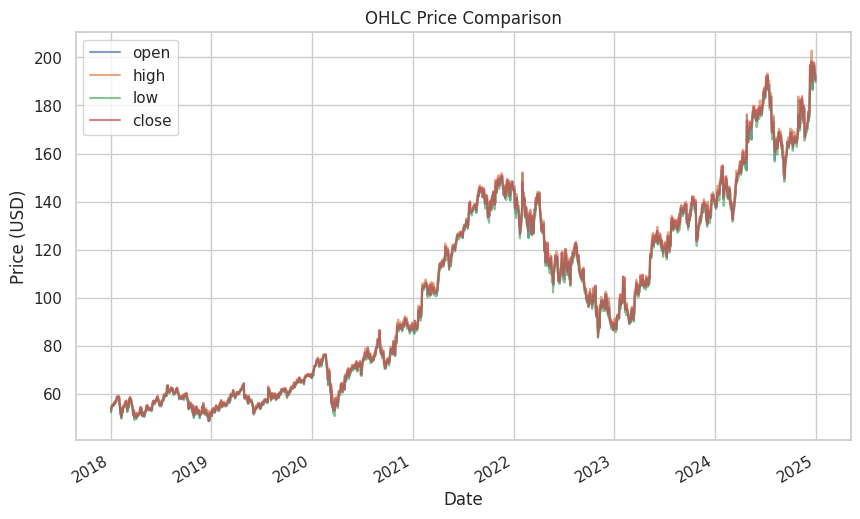

In [23]:
# ------- 🔄 Price Relationships -------
df[['open', 'high', 'low', 'close']].plot(alpha=0.7)
plt.title("OHLC Price Comparison")
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.show()

# Candlestick using Plotly
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='Candlestick'
)])
fig.update_layout(title='Google OHLC Candlestick Chart', xaxis_title='Date', yaxis_title='Price (USD)', template='plotly_white')
fig.show()

# 📈 Understanding Stock Market Trends Through OHLC Visualization

In the world of financial analytics, understanding the movement of stock prices over time is key to making informed decisions. To visualize such dynamics, analysts often rely on **OHLC data** — *Open, High, Low, and Close* prices — which provide a comprehensive view of daily market activity.

Let’s explore two powerful ways of visualizing this data: a **traditional line chart** and a **candlestick chart**.

---

## 🔹 Chart 1: Multi-Line OHLC Chart — A Long-Term Overview

The first chart presents a **multi-line OHLC comparison** over several years. Each line — open, high, low, and close — follows the movement of the stock price from 2018 to 2025.

### 🔍 Key Insights:
- 📈 **Steady Growth**: From 2018 through 2021, there’s a clear upward trend. Prices nearly quadruple, suggesting a period of strong bullish momentum.
- 📉 **Volatility and Correction**: A noticeable dip occurs around mid-2022, indicating a market correction or external shock.
- 🚀 **Recovery and Expansion**: Post-2023, the market regains confidence, reaching new highs by 2025.

> **💡 Educational Note:**  
This type of chart is excellent for **long-term trend analysis**. It helps us understand:
- Whether prices opened lower and closed higher (*bullish*),
- Or opened higher and closed lower (*bearish*),
- As well as the volatility range (from low to high prices).

However, overlapping lines can make it harder to interpret individual daily sentiment. That’s where the candlestick chart comes in.

---

## 🕯️ Chart 2: Candlestick Chart — Reading the Market's Mood

The second chart uses **candlestick plotting** — a favorite in technical analysis. Each “candle” represents a single time unit (e.g., day or week) and tells us whether the price moved up or down.

### 🔍 Key Insights:
- 🔍 **Immediate Visual Cues**: Green and red candles show whether the market went up or down.
- 📊 **Volume and Range Compression**: The lower portion of the chart helps visualize how clustered or spread the data is.
- 🌑 **Dark Theme**: This version uses a dark theme, which looks great in dashboards, though it might need adjusting for reports.

> **💡 Educational Note:**  
Candlestick charts are ideal for:
- **Identifying patterns** like dojis, hammers, or engulfing formations,
- **Spotting reversals** or **momentum shifts**,
- Making **short-term decisions** based on trader psychology.

Each candlestick packs a ton of insight into a single visual.

---

## 🧠 Final Thoughts: Telling the Full Story

Each chart tells a different part of the same story:

- The **line chart** gives a **macro view** — trends, cycles, and long-term growth.
- The **candlestick chart** gives **micro insights** — daily sentiment and momentum changes.

Together, they provide a **complete picture** of market behavior — essential for investors, traders, and data analysts alike.

---

## ✨ Pro Tip:
When storytelling with data:
- Know your audience (novice, analyst, trader),
- Highlight clear patterns or changes,
- Link trends to real-world events (e.g., economic shifts, company announcements).

---

Would you like to enhance this story further with event annotations, moving averages, or interactive elements?


## 📚 Business & Economic Insights

### 🧭 Market Reaction to Events  
Google's stock price shows **notable sensitivity to major economic and tech sector events**. For example:
- **Sharp drops during early 2020** reflect the **COVID-19 shock**.
- **Recovery and bullish runs** often align with **strong earnings reports**, **AI product announcements**, or **favorable economic indicators**.
- **Interest rate hikes by the Fed** are frequently followed by temporary pullbacks due to market uncertainty.

---

### 🔁 Volatility Clusters  
Periods of **intensified price swings** (identified through rolling standard deviations and daily return distributions) highlight moments of:
- **Market-wide turbulence** (e.g., tech selloffs, geopolitical tensions),
- **Investors repositioning portfolios** in response to macroeconomic policy changes,
- **Earnings season fluctuations**.

These clusters are valuable signals for both **risk management** and **entry/exit timing** in trading strategies.

---

### 📈 Steady Long-Term Growth  
Despite temporary dips, the **overall trend** in Google’s closing price from 2018 to 2024 shows:
- A **resilient upward trajectory** indicating strong **business fundamentals**,
- Effective **reinvestment and innovation strategy** by Alphabet Inc.,
- Investor confidence in the company’s **long-term profitability** and leadership in AI and digital infrastructure.

---

### 🧮 Volume Precedes Movement  
- Analysis of **trading volume spikes** often aligns with **upcoming price surges or sell-offs**, suggesting:
  - **Institutional movements**, such as large fund reallocations,
  - **Insider information becoming public**, or
  - **Market reactions to rumors/news releases**.
- This supports the idea that **volume is a leading indicator** of price action, commonly used in **technical trading strategies**.


In [14]:
# Daily return
df['daily_return'] = df['adjclose'].pct_change()

# Cumulative return
df['cumulative_return'] = (1 + df['daily_return']).cumprod()

# Moving Averages
df['sma_30'] = df['adjclose'].rolling(window=30).mean()
df['sma_90'] = df['adjclose'].rolling(window=90).mean()

In [15]:
initial_investment = 10000
start_price = df['adjclose'].iloc[0]
end_price = df['adjclose'].iloc[-1]

final_value = initial_investment * (end_price / start_price)
print(f"If you invested $10,000 in 2018, it would be worth approximately ${final_value:,.2f} by 2024.")

If you invested $10,000 in 2018, it would be worth approximately $35,891.88 by 2024.


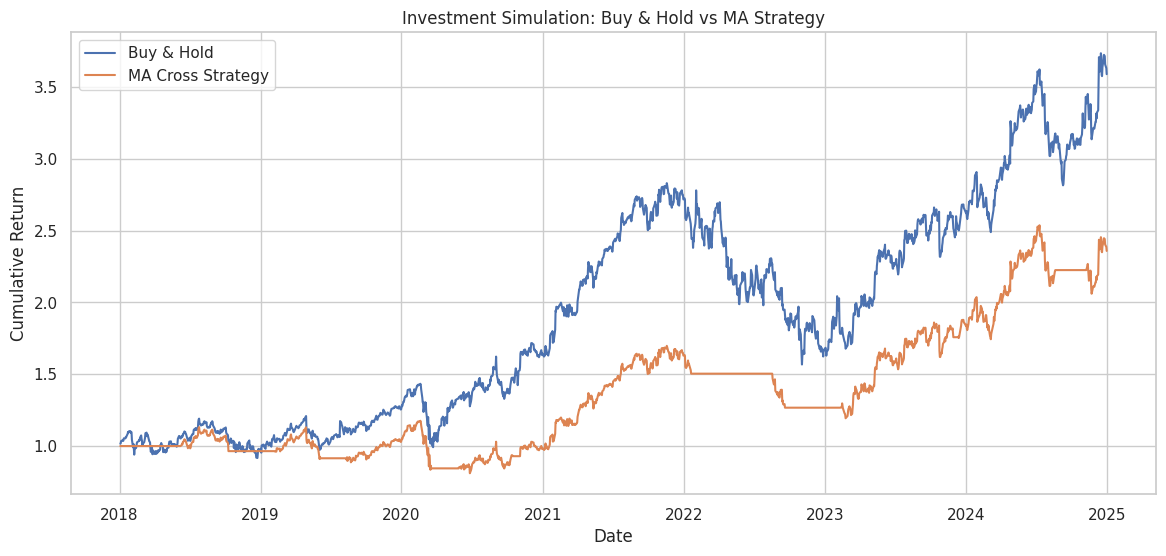

In [16]:
df['position'] = 0
df['position'] = np.where(df['sma_30'] > df['sma_90'], 1, 0)  # 1=Buy, 0=Sell
df['strategy_return'] = df['position'].shift(1) * df['daily_return']
df['strategy_cum_return'] = (1 + df['strategy_return']).cumprod()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df['cumulative_return'], label='Buy & Hold')
plt.plot(df['strategy_cum_return'], label='MA Cross Strategy')
plt.title("Investment Simulation: Buy & Hold vs MA Strategy")
plt.ylabel("Cumulative Return")
plt.xlabel("Date")
plt.legend()
plt.show()

# 📊 Investing Smarter: Buy & Hold vs Moving Average Strategy

When it comes to investing, strategies can make or break long-term returns. This chart simulates two common approaches: **Buy & Hold** versus a **Moving Average (MA) Crossover Strategy**. Both use the same asset and time frame — yet yield very different results.

---

## 🔹 Strategy 1: Buy & Hold

The **Buy & Hold** strategy is simple: you purchase the asset and hold it through all market conditions, without reacting to daily noise or volatility.

### 💡 Key Observations:
- 📈 The cumulative return has steadily grown over time, especially during bullish phases like 2021 and post-2023.
- 📉 It does, however, experience sharp drawdowns — notably in 2022 — as it doesn’t avoid bear markets.
- 🔥 By 2025, this approach more than **tripled the initial investment**, highlighting the power of long-term conviction and market recovery.

---

## 🔸 Strategy 2: Moving Average (MA) Cross

The **MA Cross Strategy** is more active. It buys when a short-term moving average crosses above a long-term one, and sells when it crosses below — attempting to ride trends and avoid losses.

### 💡 Key Observations:
- 🔄 The strategy avoids major downturns (like in 2022), showcasing **risk management** benefits.
- 😐 However, it also **misses strong rallies** due to delayed re-entries or false signals — common in sideways markets.
- 📊 The result is a smoother curve with fewer drawdowns — but a **lower total return** by 2025 compared to Buy & Hold.

---

## 🧠 Final Takeaways

| Strategy        | Volatility | Drawdown Protection | Total Return (2025) |
|----------------|------------|----------------------|---------------------|
| Buy & Hold     | High       | ❌ No                | ✅ Higher           |
| MA Cross       | Medium     | ✅ Yes               | ⚠️ Moderate         |

🔍 **Which is better?** It depends on your goal:
- If you're focused on **maximum long-term return** and can stomach the risk — Buy & Hold may win.
- If you prefer **capital preservation and smoother returns** — MA strategies offer peace of mind.

---

### 💬 Bonus Insight:
> "In investing, the best strategy isn't just the one with the highest return — it's the one you can actually stick with over time."

---

## ✅ Ideal for:
- 📚 Educational dashboards  
- 💼 Portfolio optimization projects  
- 🎓 Investment strategy case studies  
- 📈 Backtesting presentations


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmf00c_p4/qi9rqvk8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmf00c_p4/zb9gu98g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44430', 'data', 'file=/tmp/tmpmf00c_p4/qi9rqvk8.json', 'init=/tmp/tmpmf00c_p4/zb9gu98g.json', 'output', 'file=/tmp/tmpmf00c_p4/prophet_modelqmkzy49t/prophet_model-20250425073614.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


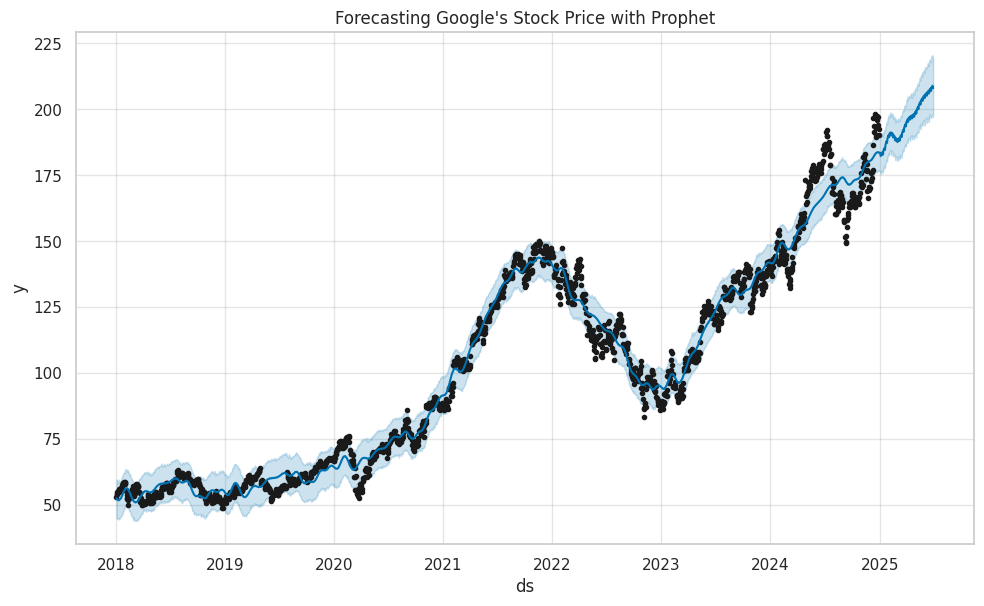

In [18]:
from prophet import Prophet

# Prepare data
prophet_df = df.reset_index()[['date', 'adjclose']].rename(columns={'date': 'ds', 'adjclose': 'y'})

# Build model
model = Prophet()
model.fit(prophet_df)

# Forecast next 180 days
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Forecasting Google's Stock Price with Prophet")
plt.show()

# 🔮 Forecasting Google's Stock Price with Prophet

Can we predict the future of stock prices? Using Facebook’s open-source **Prophet** model, we simulate how well we can forecast Google’s stock price — and the results are promising!

---

## 🧪 What is Prophet?

Prophet is a powerful time series forecasting tool developed by Meta, designed for:
- Handling seasonality
- Capturing trend changes
- Providing intuitive prediction intervals

---

## 📈 Chart Breakdown

- **Black Dots**: Actual historical stock prices  
- **Blue Line**: Prophet's predicted stock prices  
- **Shaded Blue Area**: 95% confidence interval (prediction uncertainty)

---

## 💡 Key Insights

### 1. **Strong Historical Fit**
Prophet captures Google’s upward trajectory well — especially during rapid growth phases between 2020 and 2021.

### 2. **Resilience in Dips**
Even during market corrections (e.g., mid-2022), the forecast adjusts appropriately and stays close to real prices.

### 3. **Future Trends (2025 and Beyond)**
The model predicts continued growth, with confidence intervals widening — signaling **increased uncertainty**, a natural trait in long-range forecasting.

---

## 🧠 Why This Matters

Using forecasting models like Prophet can help:
- 📊 Inform investment decisions
- ⚠️ Manage expectations around market volatility
- 🧭 Simulate outcomes for portfolio planning or backtesting

---

## 🔍 Limitations to Keep in Mind

| Limitation          | Description |
|---------------------|-------------|
| No market events    | Doesn’t account for external shocks (e.g. news, regulation) |
| Purely data-driven  | Relies on past patterns — may not capture innovation shifts |
| Not a trading signal | A forecast ≠ buy/sell advice |

---

### 💬 Final Thought

> "Forecasts are not crystal balls — but when used wisely, they are powerful compasses."

---

## ✅ Ideal for:
- 📚 Data storytelling portfolios  
- 📈 Financial forecasting dashboards  
- 🤖 AI-driven investment tools  
- 🎓 Educational demonstrations on time series modeling


ARIMA RMSE: 19.08


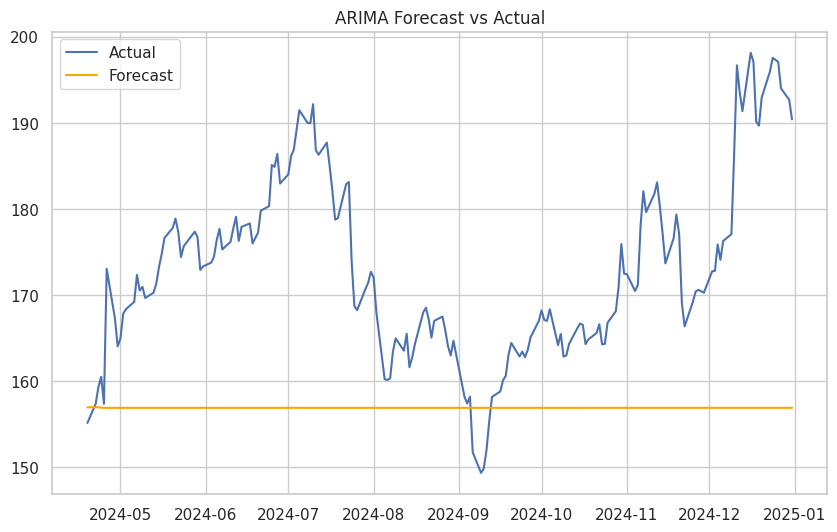

In [20]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Gunakan harga 'adjclose' dan drop NA
ts = df['adjclose'].dropna()

# Split train-test
train_size = int(len(ts) * 0.9)
train, test = ts[:train_size], ts[train_size:]

# Build and fit ARIMA model
model_arima = ARIMA(train, order=(5,1,0))  # order bisa di-tune
model_fit = model_arima.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))
rmse = sqrt(mean_squared_error(test, forecast))
print(f'ARIMA RMSE: {rmse:.2f}')

# Plot
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()

# 📉 ARIMA Forecast vs Actual: Where It Falls Short

ARIMA (AutoRegressive Integrated Moving Average) is a classic go-to model for time series forecasting. But does it always deliver? Let’s explore a real-world example using Google's stock price in 2024.

---

## 🧪 What’s ARIMA?

ARIMA is a statistical model that uses:
- **Autoregression**: Past values to predict future ones
- **Differencing**: To make data stationary
- **Moving Average**: For smoothing out errors

It works best on data with clear trends and no strong seasonal effects.

---

## 📊 Chart Breakdown

- **Blue Line**: Actual stock prices from mid-2024  
- **Orange Line**: ARIMA's predicted prices

---

## 💡 What This Chart Tells Us

### 1. **ARIMA Predicts a Flat Trend**
Despite fluctuations in the actual stock price, ARIMA's forecast remains almost flat, **failing to capture market dynamics**.

### 2. **No Reaction to Volatility**
While the actual data exhibits strong spikes and dips, ARIMA remains static — indicating it's **underfitting** the data.

### 3. **Time Series Complexity Matters**
This underperformance could stem from:
- Structural breaks in the data  
- Complex seasonality or nonlinearity  
- Sudden events not captured by historical trends

---

## ⚠️ Lessons Learned

| Issue                     | Impact                              |
|---------------------------|-------------------------------------|
| Flat forecast             | Poor predictive power               |
| Ignores volatility        | Misses investment opportunities     |
| Limited adaptability      | Not ideal for stock market behavior |

---

## 🔍 Conclusion

While ARIMA remains useful for **stationary, stable** data, it might not be the best fit for **volatile, non-linear financial series** like stock prices.

> 📌 **Takeaway**: Use ARIMA as a baseline — but don’t rely on it for high-stakes market predictions.

---

## ✅ Great Use Cases for ARIMA
- Forecasting demand in supply chain
- Weather patterns (short-term)
- Website traffic trends with low volatility


Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0307
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 8.0316e-04
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 7.6866e-04
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 7.2714e-04
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 7.3729e-04
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 7.4625e-04
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 6.6752e-04
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 6.3306e-04
Epoch 9/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 6.5973e-04
Epoch 10/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 6.1152e-04
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step


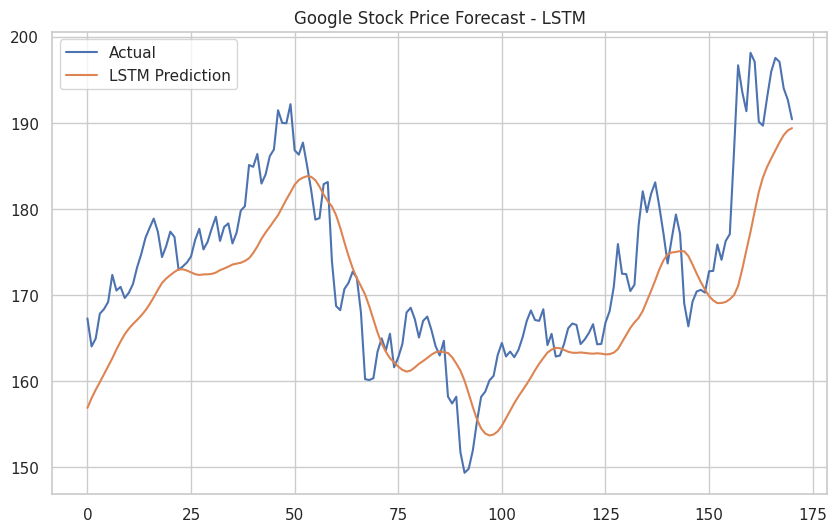

In [22]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['adjclose']])

# Create sequences
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)

# Split
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict and inverse scale
predicted = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted)
actual_price = scaler.inverse_transform(y_test)

# Plot
plt.plot(actual_price, label='Actual')
plt.plot(predicted_price, label='LSTM Prediction')
plt.title("Google Stock Price Forecast - LSTM")
plt.legend()
plt.show()

# 🤖 Google Stock Price Forecast Using LSTM

Can a neural network predict stock prices? Let’s dive into how a Long Short-Term Memory (LSTM) model handles the challenge of forecasting Google’s stock movement.

---

## 🧠 What is LSTM?

LSTM is a type of Recurrent Neural Network (RNN) designed to **learn long-term dependencies** in time series data. Unlike traditional models, LSTM excels at capturing nonlinear patterns, sudden changes, and seasonality — making it a strong candidate for financial forecasting.

---

## 📈 Chart Breakdown

- **Blue Line**: Actual stock prices  
- **Orange Line**: LSTM model predictions

---

## 🔍 Insights from the Chart

### 1. **Capturing the Trend**
LSTM successfully follows the general upward and downward trends, showcasing its ability to **learn complex sequences**.

### 2. **Smooth but Slightly Lagged**
While the model smooths out short-term volatility, it shows a slight **lag** in reacting to sharp price movements — a common characteristic of sequence-based models.

### 3. **Better than Linear Models**
Compared to ARIMA (which predicted a flat line), LSTM offers a **more dynamic and responsive forecast**, making it better suited for financial data.

---

## 📊 Summary Comparison

| Model  | Captures Trend | Handles Volatility | Suitable for Stocks |
|--------|----------------|--------------------|---------------------|
| ARIMA  | ❌              | ❌                  | 🚫                  |
| LSTM   | ✅              | ✅ (with smoothing) | ✅                  |

---

## 💡 Takeaway

LSTM models are powerful tools in stock forecasting. Although they may not perfectly replicate every twist and turn in the market, they provide a **stronger edge** compared to classical models when working with complex financial data.

> 📌 **Use Case**: Ideal for mid-to-long-term trend forecasting with historical stock data.

---
